In [1]:
import numpy as np
import numpy.testing as npt
from scipy.linalg import expm
import matplotlib.pyplot as plt
import scipy.spatial, scipy.linalg
import scipy.sparse.linalg
import pandas as pd
%matplotlib inline

class PCA():
    def __init__(self, X):
        # ...
        self.X = X
        C = np.cov(self.X.T)
        D, U = np.linalg.eig(C)
        idx = np.argsort(-D)
        Ut = U.T
        self.U = Ut[idx]
        self.D = D[idx]

    
    def project(self, m):
        # ...
        U = self.U.T
        M = U[:,:m] 
        Z = np.dot(M.T,self.X.T)
        Z = Z.T 
        Z = Z -np.mean(Z,axis=0)
        return Z
    
    def reconstruct(self, m):
        Z = self.project(m)
        U = self.U.T
        Y = np.dot(U[:,:m],Z.T)
        Y = Y + np.mean(Y,axis=1).reshape(len(Y),1)
        return Y.T

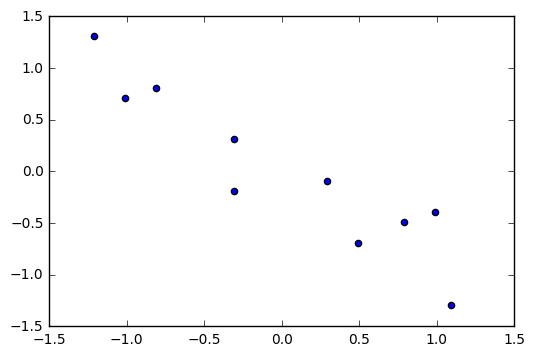

In [2]:
#2.1 PCA: 2-dimensional Toy Data 
#(a)Load the dataset pca-data-2d.dat and make a scatter plot of the centered data.
dat = pd.read_table('pca-data-2d.dat',header=None,delim_whitespace=True)
X =dat.as_matrix()
Xc = X -np.mean(X, axis=0)
plt.scatter(Xc[:,0],Xc[:,1])

[[ 0.73517866 -0.6778734 ]
 [ 0.6778734   0.73517866]]


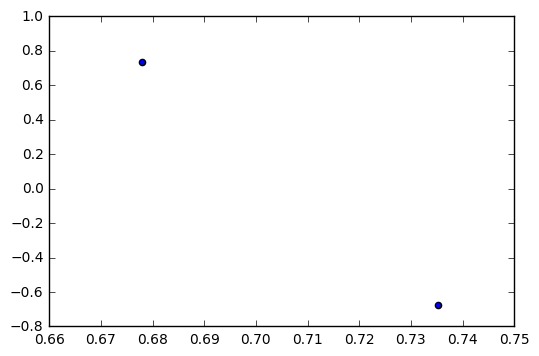

In [3]:
#(b) Determine the Principal Component Directions (PCs) and make another scatter plot of the
# same data points in the coordinate system spanned by the 2 PCs.
pca = PCA(Xc)
print(pca.U)
plt.scatter(pca.U[:,0],pca.U[:,1])

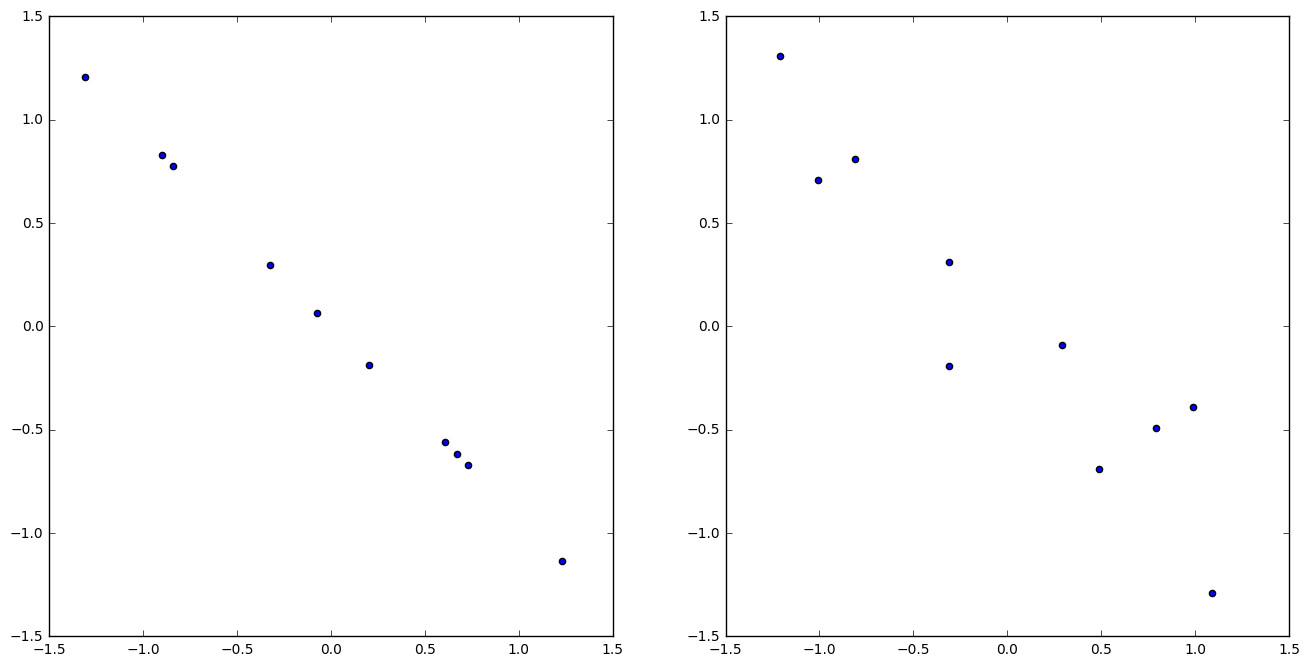

In [4]:
#(c) PCA can be used to compress data e.g. using only information contained in the first n out
#    of N PCs. Plot the reconstruction of the data in the original coordinate system when using
#   (i) only the first or (ii) only the second PC for reconstruction.

z1=pca.reconstruct(1)
z2=pca.reconstruct(2)
plt.figure(figsize=(16, 8))
plt.subplot(121)
plt.scatter(z1[:,0],z1[:,1])
plt.subplot(122)
plt.scatter(z2[:,0],z2[:,1])

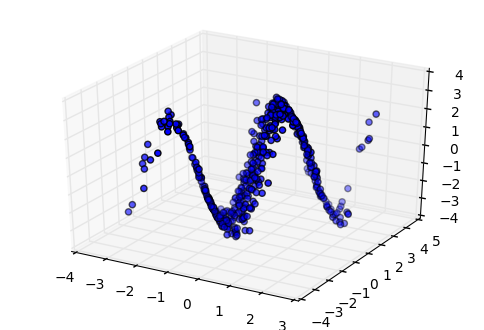

In [5]:
#2.2 PCA: 3-dimensional Toy Data
#(a) Load the dataset pca-data-3d.txt, center it, and show the scatter plot matrix.
dat3 = np.loadtxt('pca-data-3d.txt', skiprows=1, delimiter=',')
Xc3 = dat3 -np.mean(dat3, axis=0)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xc3[:,0], Xc3[:,1], Xc3[:,2])

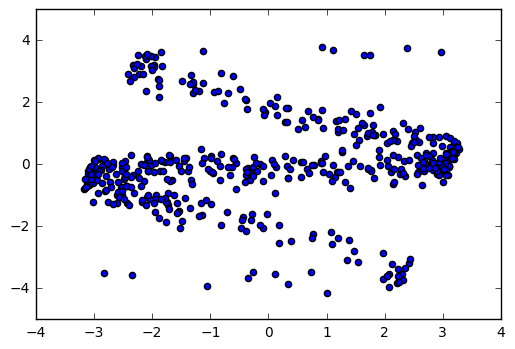

In [6]:
#(b) Determine the PCs and make the analogous scatter plot matrix for the 2d-coordinate systems
#    spanned by the different pairs of PCs.
pca3 = PCA(Xc3)
Y = pca3.project(2)
plt.scatter(Y[:,0],Y[:,1])


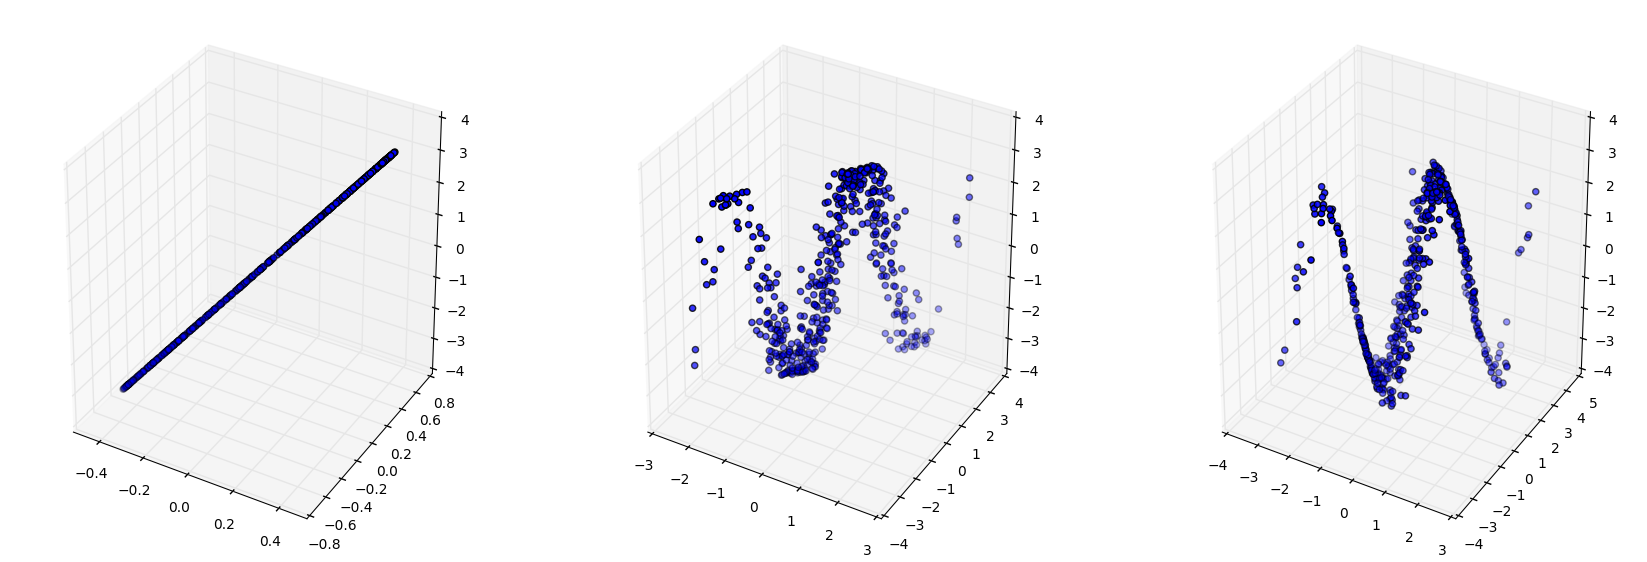

In [7]:
#(c) Examine the 3d-reconstruction of the data in the original coordinate systems when using
#    only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful
#    these directions (i.e., the PCs) are.
Y1 = pca3.reconstruct(1)
Y2 = pca3.reconstruct(2)
Y3 = pca3.reconstruct(3)
fig = plt.figure(figsize=(21, 7))
ax = fig.add_subplot(131, projection='3d')
ax.scatter(Y1[:,0], Y1[:,1], Y1[:,2])
ax = fig.add_subplot(132, projection='3d')
ax.scatter(Y2[:,0], Y2[:,1], Y2[:,2])
ax = fig.add_subplot(133, projection='3d')
ax.scatter(Y3[:,0], Y3[:,1], Y3[:,2])

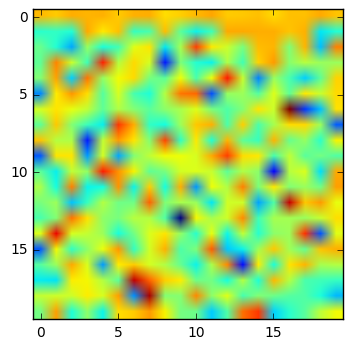

In [8]:
#2.3 Projections of a dynamical system
#    Using the data from the file expDat.txt, we can interpret the data as describing the process
#    of a ”large” system with d=20 dimensions at each timepoint (cf. Exercise Sheet 1).
usecol= np.arange(1,21)
expdata = np.loadtxt('expDat.txt', skiprows=1, delimiter=',',usecols=usecol)

#(a) Find the 20 Principal Components (PCs) of this dataset
exppca=PCA(expdata)
plt.imshow(exppca.U)

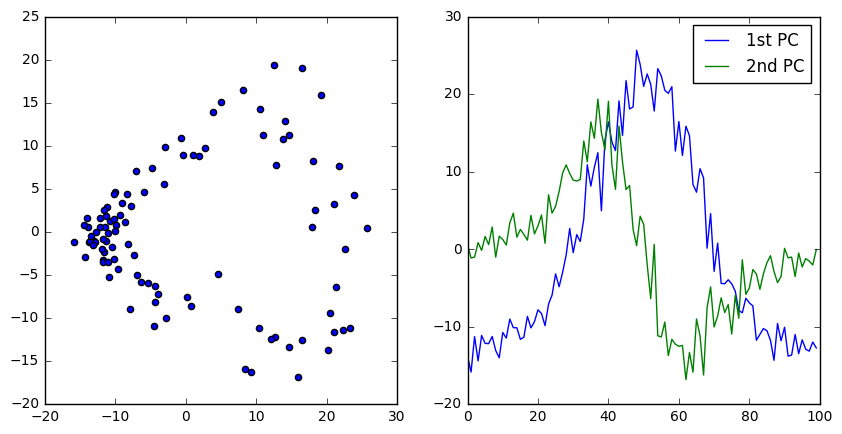

In [9]:
#(b)
Z = exppca.project(2)
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(Z[:,0],Z[:,1])
#plt.plot(np.arange(1,102), label="Line 1", linestyle='--')
plt.subplot(122)
plt.legend("1st PC")
plt.plot(Z[:,0],label="1st PC")
plt.plot(Z[:,1],label="2nd PC")
plt.legend() 

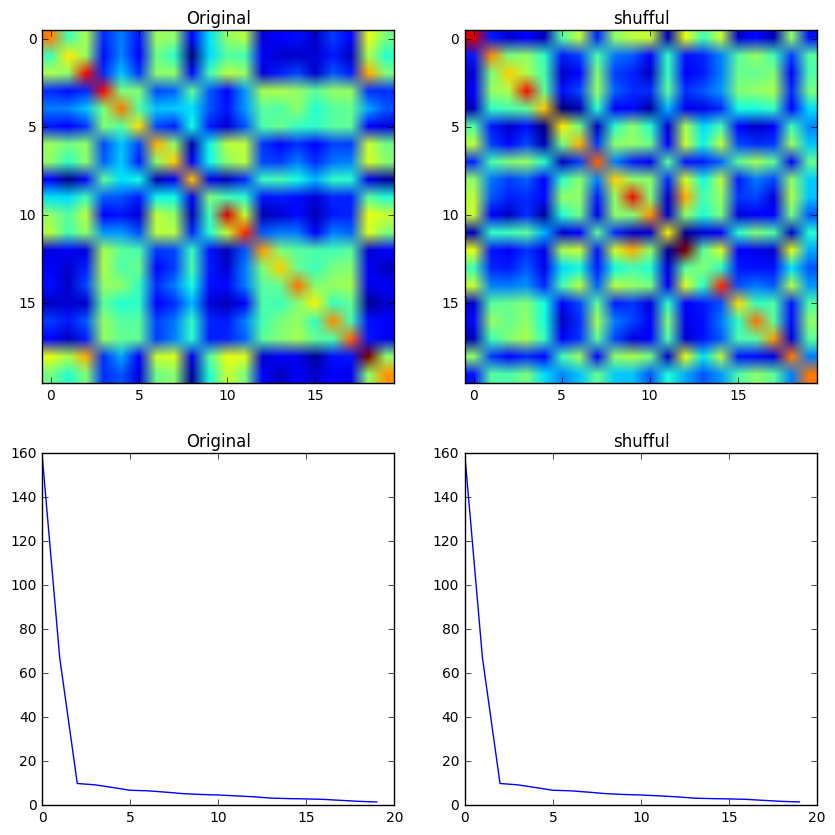

In [11]:
#(c) Create a new dataset by shuffling the data (i.e. reorder for each of the 20 columns the 100
#    data point components in a different random sequence)
num = np.arange(0,20)
np.random.shuffle(num)
rmdm = expdata[:,num]
rmdmpca = PCA(rmdm)
#(d) Plot the covariance matrices and scree plots for both the original and the scrambled data and
#    interpret your results
N = len(num)
X = expdata - np.mean(expdata,axis=0)
C = np.dot(X.T,X)/N

rX = rmdm  - np.mean(rmdm,axis=0)
rC = np.dot(rX.T,rX)/N

covrmdat= np.cov(rmdm.T)
plt.figure(figsize=(10, 10))
plt.subplot(221)
plt.title("Original")
plt.imshow(C)
plt.subplot(222)
plt.title("shufful")
plt.imshow(rC)
plt.subplot(223)
plt.title("Original")
plt.plot(exppca.D)
plt.subplot(224)
plt.title("shufful")
plt.plot(rmdmpca.D)

(e) What would be the result if shuffling the data points in the same sequence for all columns (that is randomizing the row order)? (To answer this question no programming is required.)

No difference between them because every element of cov mat is expected value of covarience between each elements of feature vector. So cov mat is independent from a sequence of data set.

In [46]:
import matplotlib.cm as cm
from PIL import Image
import matplotlib.image as mpimg
import zipfile
import io
zippath = 'imgpca.zip'
img = zipfile.ZipFile(zippath)

In [47]:
#(a) Sample (randomly) a total of at least N=5000 patches (e.g. 500 per image) of 16x16 pixels
#    from this set of images and assemble them in a big Nx256 matrix.

bilder = []
N = 5000
patchb256 = np.empty((N,256))
patchn256 = np.empty((N,256))

nb = 0
for i in range(10):    
    imgname = ('imgpca/b%i.jpg'%(i+1))
    bild = Image.open( io.BytesIO(img.read(imgname)) )
    b = np.array(bild)
    imgrowb = len(b)
    imgcolb = len(b[0])
    samplerowb =np.random.choice((imgrowb-16), 500)
    samplecolb =np.random.choice((imgcolb-16), 500)
    for j in range(500):
        tmpb = b[samplerowb[j]:samplerowb[j]+16,samplecolb[j]:samplecolb[j]+16]
        tmpb = tmpb.reshape(1,256)
        patchb256[nb] = tmpb
        nb = nb +1
        
    bilder.append(bild)


nn= 0
for i in range(10):   
    imgname = ('imgpca/n%i.jpg'%(i+1))
    bild = Image.open( io.BytesIO(img.read(imgname)) )
    n = np.array(bild)
    imgrown = len(n)
    imgcoln = len(n[0])
    samplerown =np.random.choice((imgrown-16), 500)
    samplecoln =np.random.choice((imgcoln-16), 500)
    for j in range(500):
        tmpn = n[samplerown[j]:samplerown[j]+16,samplecoln[j]:samplecoln[j]+16]
        tmpn = tmpn.reshape(1,256)
        patchn256[nn] = tmpn
        nn = nn +1
    bilder.append(bild)




Eigenvecotor of building


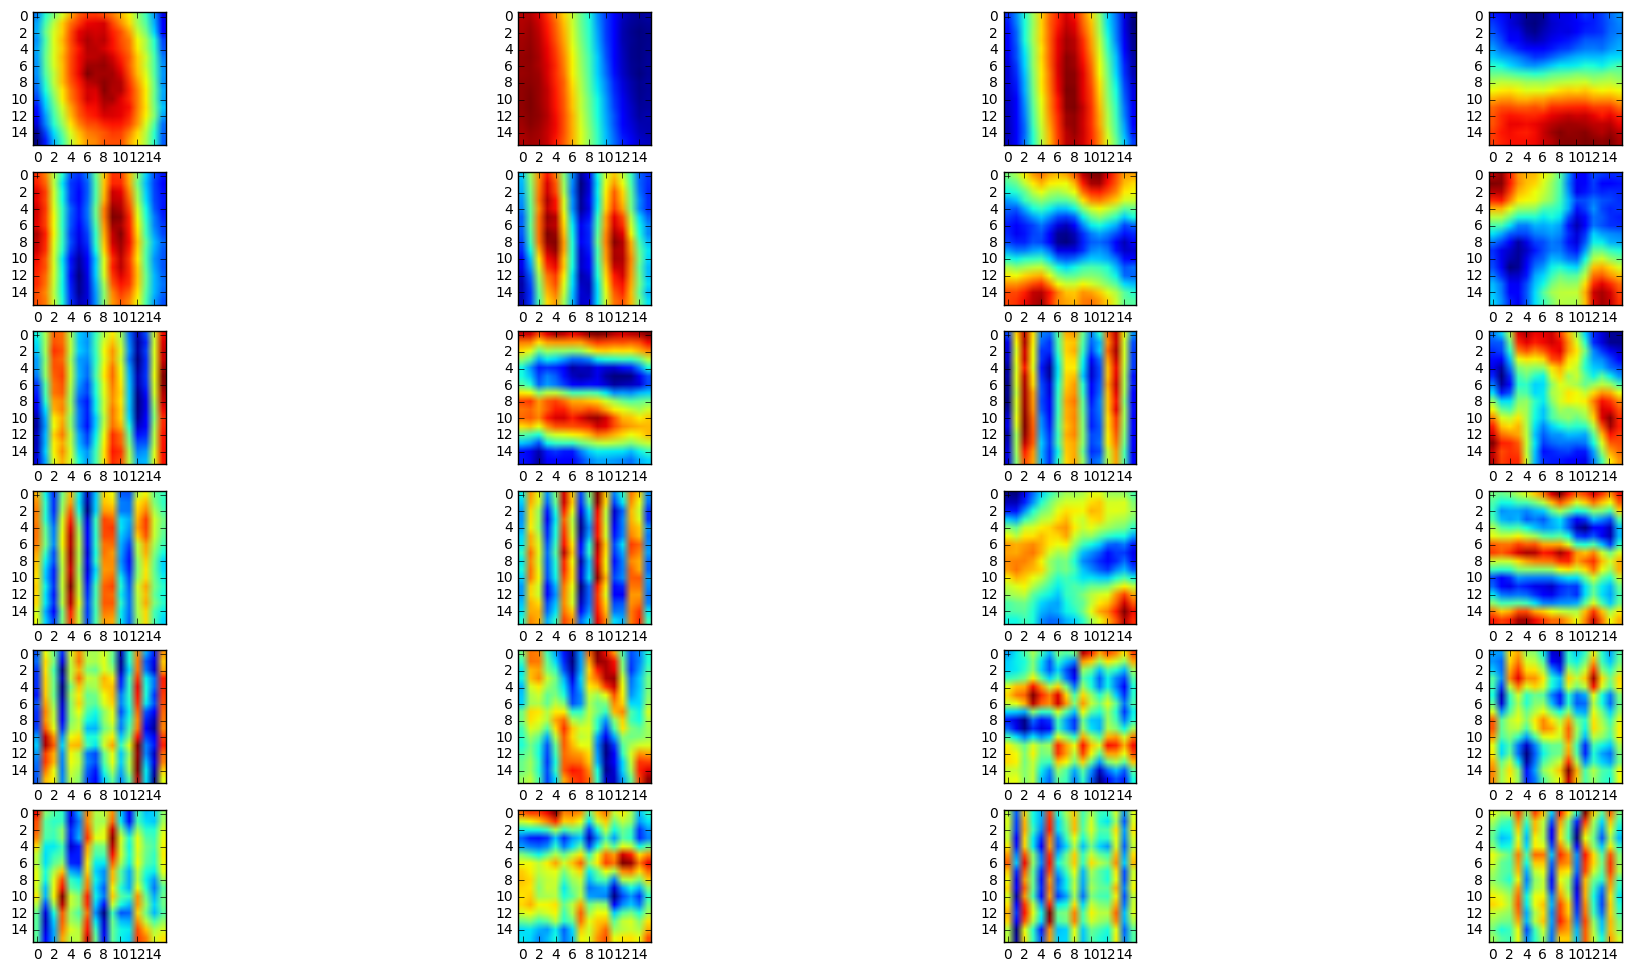

In [48]:
#(b) Calculate the PCs of these image patches and show the first 24 as 16x16 image patches. Are
#    there differences between the PCs for buildings vs. nature?

bpca = PCA(patchb256)
npca = PCA(patchn256)

print("Eigenvecotor of building")
plt.figure(figsize=(24, 12))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(bpca.U[i].reshape(16,16))

Eigenvecotor of neighture


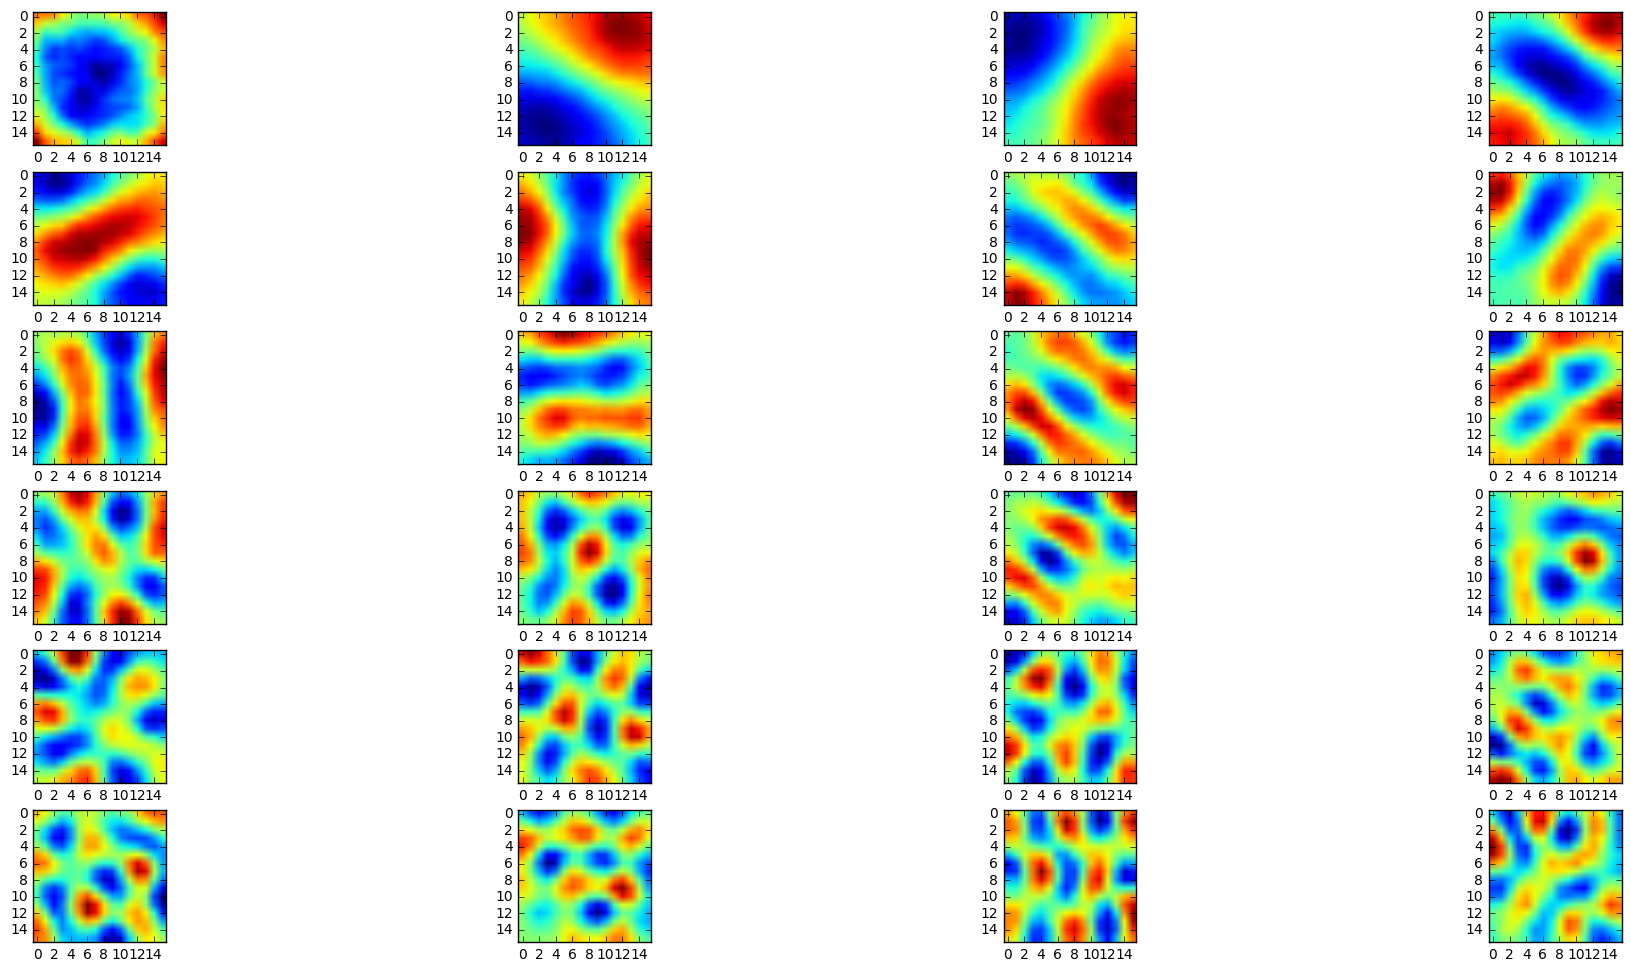

In [49]:
print("Eigenvecotor of neighture")
plt.figure(figsize=(24, 12))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.imshow(npca.U[i].reshape(16,16))

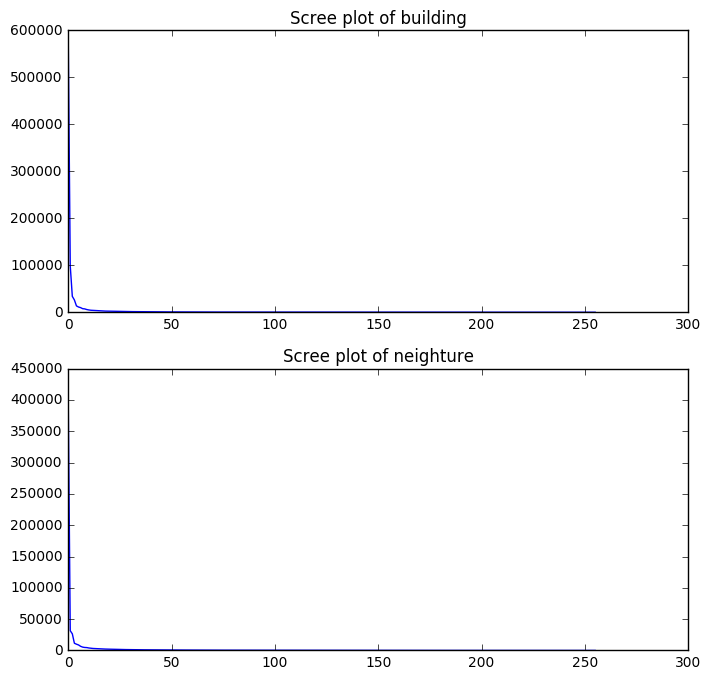

In [50]:
#(c) Answer using a scree plot: how many PCs should you keep for each of the two image
#    groups? What are the resulting respective compression ratios?
plt.figure(figsize=(8, 8))
plt.subplot(211)
plt.title("Scree plot of building")
plt.plot(bpca.D)
plt.subplot(212)
plt.title("Scree plot of neighture")
plt.plot(npca.D)

In [51]:
#(d)
idx = np.empty((len(bilder),2))
n = 0
for i in bilder:
    idx[n]=np.array(i).shape
    n = n+1
idx16 = idx%16
idxc1 = np.where(idx[:,0]%16==0.)
idxc2 = np.where(idx[:,1]%16==0.)
intersect = np.intersect1d(idxc1,idxc2)
mbilder = []
for i in intersect:
    mbilder.append(np.array(bilder[i]))

In [108]:
ic=[1,2,4,8,16,100]


def mkpatch(img):
    count = 0
    shape=img.shape
    n = int(shape[0]/16)*int(shape[1]/16)
    patches = np.empty((n,256))
    for j in range(int(shape[0]/16)):
        for k in range(int(shape[1]/16)):
            tmp=img[j*16:((j+1)*16),k*16:((k+1)*16)]
            patches[count] = tmp.reshape(1,256)
            count = count +1
    return patches


mkpatch(mbilder[9])

512


array([[ 128.,  129.,  128., ...,  126.,  125.,  122.],
       [ 134.,  132.,  134., ...,  132.,  131.,  134.],
       [ 138.,  137.,  137., ...,  149.,  151.,  148.],
       ..., 
       [   5.,    5.,    5., ...,    5.,    5.,    5.],
       [  44.,    9.,    4., ...,    5.,    5.,    5.],
       [  43.,   46.,   16., ...,    5.,    5.,    5.]])

In [116]:
mdpt = mkpatch(mbilder[0])
ptchpca= PCA(mdpt)
for n in ic:
    prcd=ptchpca.project(n)


512


TypeError: 'type' object is not subscriptable

In [71]:
hako_all = []
hako=[]
hako.append([1,2,3])
hako.append([4,5,6])
hako_all.append(hako)
hako_all[0][1]

[4, 5, 6]

In [82]:
512/16

32.0